# Loading the data

In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import os
import sys
import glob
import pandas as pd
from pathlib import Path


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

CV_TYPE = 'lopo'

model_name = 'ProjNetMerged4'
filepaths = glob.glob('/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/'
    f'models/predict_{CV_TYPE}/{model_name}/csv/*')

filepaths.sort()
filepath = filepaths[-1]
print(filepath)

center_colors = {
    'Bern' : '#d7191c',
    'Cologne' : '#2c7bb6',
    'All' : '#5e3c99'
}

df = pd.read_csv(filepath)

df = df[df['tweening'] == False]
df = df[df['noisy'] == False]
df = df.drop(columns = ['massive_filename'])
#df = df.drop(columns = ['leadModel', 'contactID', 'step_interp_score', 'part', 'lin_interp_score', 'zeroed', 'tweening', 'prediction_rounded'])
df = df.rename(columns={'mapping_score' : 'label'})
df['label'] = df['label'].apply(lambda x : np.where(x > 0.8330957480952411, 1, 0)).astype('Int64')
#df['label'] = df['label'].apply(lambda x : np.where(x > 0.999999, 1, 0)).astype('Int64')
#df['prediction'] = df['prediction'].apply(np.round).astype(int)
if CV_TYPE == 'lopo' :
    df['merged_prediction'] = df['merged_prediction'].apply(np.round).astype(int)


levels = (0, 16, 17, 7, 8, 18, 19, 15)
contacts = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)
contact_to_levels = {
    0 : 0,
    16 : 1,
    17 : 2,
    7 : 3,
    8 : 0,
    18 : 1,
    19 : 2,
    15 : 3}
contact_to_hemisphere_lvl = {
    0 : 'right',
    16 : 'right',
    17 : 'right',
    7 : 'right',
    8 : 'left',
    18 : 'left',
    19 : 'left',
    15 : 'left'}
contact_to_hemisphere_cnt = {
    0 : 'right',
    1 : 'right',
    2 : 'right',
    3 : 'right',
    4 : 'right',
    5 : 'right',
    6 : 'right', 
    7 : 'right',
    8 : 'left',
    9 : 'left',
    10 : 'left',
    11 : 'left',
    12 : 'left',
    13 : 'left',
    14 : 'left',
    15 : 'left'}

vercise_to_hemisphere = {
    0 : 'right',
    1 : 'right',
    2 : 'right',
    3 : 'right',
    4 : 'right',
    5 : 'right',
    6 : 'right', 
    7 : 'right',
    16 : 'right',
    17 : 'right',
    8 : 'left',
    9 : 'left',
    10 : 'left',
    11 : 'left',
    12 : 'left',
    13 : 'left',
    14 : 'left',
    15 : 'left',
    18 : 'left',
    19 : 'left'}


from sklearn.metrics import confusion_matrix
    
def get_tn(y_true, y_pred):
    conf = confusion_matrix(y_true, y_pred).ravel()
    if len(conf) < 4:
        return 0
    else:
        return conf[0]
    
def get_fp(y_true, y_pred):
    conf = confusion_matrix(y_true, y_pred).ravel()
    if len(conf) < 4:
        return 0
    else:
        return conf[1]

def get_fn(y_true, y_pred):
    conf = confusion_matrix(y_true, y_pred).ravel()
    if len(conf) < 4:
        return 0
    else:
        return conf[2]

def get_tp(y_true, y_pred):
    conf = confusion_matrix(y_true, y_pred).ravel()
    if len(conf) < 4:
        return conf[0]
    else:
        return conf[3]

def get_total(y_true, y_pred):
    return sum(confusion_matrix(y_true, y_pred).ravel())

df['hemisphere'] = df['verciseID'].map(vercise_to_hemisphere)
df['leadID'] = df.apply(lambda row: row['patientID'] + 0.5 if row['hemisphere'] == 'left' else row['patientID'] + 0.0, axis=1)
df = df[df['mapping'] == 1]
df['label'] = df['label'].astype(float)

/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/models/predict_lopo/ProjNetMerged4/csv/23.09.13.17:26:26_es.csv


In [9]:
df

,centerID,leadModel,patientID,contactID,verciseID,amplitude,mapping,label,part,lin_interp_score,...,noisy,original_vta,added_voxels,total_voxels,prediction_rounded,prediction,merged_prediction_rounded,merged_prediction,hemisphere,leadID
21,Bern,Boston Scientific Vercise,1.0,0.0,0,4.5,1.0,0.0,1.0,0.333333,...,False,NaN,0,303.0,0.0,0.000374,0.0,0,right,1.0
38,Bern,Boston Scientific Vercise,1.0,1.0,1,3.0,1.0,1.0,1.0,1.000000,...,False,NaN,0,126.0,1.0,0.704439,1.0,1,right,1.0
66,Bern,Boston Scientific Vercise,1.0,2.0,2,3.5,1.0,1.0,1.0,1.000000,...,False,NaN,0,201.0,1.0,0.597907,1.0,1,right,1.0
83,Bern,Boston Scientific Vercise,1.0,3.0,3,2.5,1.0,1.0,1.0,1.000000,...,False,NaN,0,99.0,1.0,0.919704,1.0,1,right,1.0
124,Bern,Boston Scientific Vercise,1.0,4.0,4,5.0,1.0,1.0,1.0,1.000000,...,False,NaN,0,378.0,1.0,0.855959,1.0,1,right,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24157,Cologne,Boston Scientific Vercise,240.0,2.0,2,2.0,1.0,0.0,1.0,0.333333,...,False,NaN,0,63.0,0.0,0.004224,0.0,0,right,240.0
24165,Cologne,Boston Scientific Vercise,240.0,2.0,2,3.0,1.0,0.0,1.0,0.333333,...,False,NaN,0,165.0,0.0,0.104255,0.0,0,right,240.0
24172,Cologne,Boston Scientific Vercise,240.0,2.0,2,4.0,1.0,0.0,1.0,0.666667,...,False,NaN,0,255.0,0.0,0.124955,0.0,0,right,240.0
24193,Cologne,Boston Scientific Vercise,240.0,3.0,3,3.0,1.0,0.0,1.0,0.500000,...,False,NaN,0,159.0,0.0,0.044257,0.0,0,right,240.0


/tmp/ipykernel_15656/4287441328.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['label_jitter'] = subset_df['label'] + 0.01 * np.random.rand(len(subset_df))
/tmp/ipykernel_15656/4287441328.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['prediction_jitter'] = subset_df['prediction'] + 0.01 * np.random.rand(len(subset_df))
/tmp/ipykernel_15656/4287441328.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

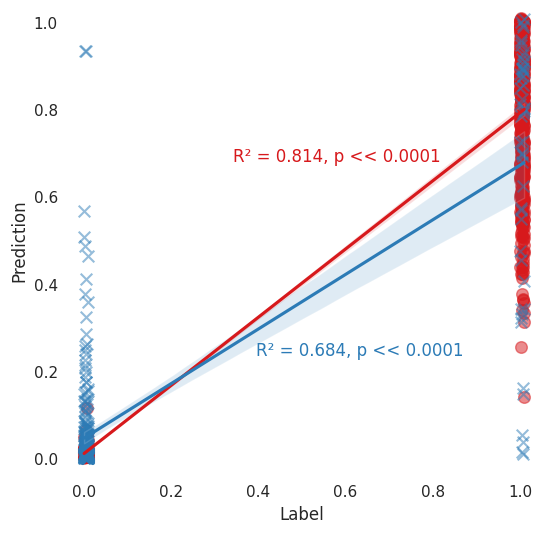

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


center_colors = {
    'Bern': '#d7191c',
    'Cologne': '#2c7bb6'
}

# Create the regression plot
sns.set_theme()
plt.figure(figsize=(10, 6))
marker_style = {'Bern': 'o', 'Cologne': 'x'}

pos = {
    'Bern' : (0.35, 0.67),
    'Cologne' : (0.4, 0.25)
}

for center, color in center_colors.items():
    subset_df = df[df['centerID'] == center]
    subset_df['label_jitter'] = subset_df['label'] + 0.01 * np.random.rand(len(subset_df))
    subset_df['prediction_jitter'] = subset_df['prediction'] + 0.01 * np.random.rand(len(subset_df))
    sns.regplot(x='label_jitter', y='prediction_jitter', data=subset_df, marker=marker_style[center], scatter_kws={'color': color, 'alpha': 0.5, 's' : 70}, line_kws={'color': color})

    # Calculate the R-squared and p-value
    slope, intercept, r_value, p_value, std_err = stats.linregress(subset_df['label'], subset_df['prediction'])
    if p_value < 0.00001:
        p_text = 'p << 0.0001'
    else :
        p_text = f"p = {'{:.2e}'.format(p_value)}"
    plt.text(*pos[center],
            f"R\u00b2 = {r_value**2:.3f}, {p_text}",
            transform=plt.gca().transAxes,
            color=center_colors[center])
    

plt.xlim(-0.03, 1.03)
plt.ylim(-0.03, 1.03)
# Set the aspect ratio to make the graph square
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Label')
plt.ylabel('Prediction')
plt.gca().set_facecolor('none')
#plt.title('Regression Plot of Labels vs Predictions')
plt.show()


In [86]:
df[df['centerID'] == 'Bern']['label'].value_counts()

label
1.0    532
0.0    125
Name: count, dtype: int64